### Upsampling and downsampling with sklearn

In [4]:
import sklearn
import pandas as pd
import numpy as np
import scikitplot as skplt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier

In [19]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
sns.set()

In [3]:
df = pd.read_csv('../data/train.csv', '|')
df.fraud.value_counts()

0    1775
1     104
Name: fraud, dtype: int64

### Test on imbalanced data

In [4]:
X_imb = df.drop('fraud', axis=1)
y_imb = df['fraud']

X_train_imb, X_test_imb, y_train_imb, y_test_imb =  train_test_split(X_imb, y_imb, test_size=0.2)

clf_imb = clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf_imb.fit(X_train_imb, y_train_imb)
clf_imb.score(X_test_imb, y_test_imb)

0.9547872340425532

In [5]:
prob_y_imb = clf_imb.predict_proba(X_test_imb)
prob_y_imb = [p[1] for p in prob_y_imb]

In [6]:
roc_auc_score(y_test_imb, prob_y_imb)

0.984187626021437

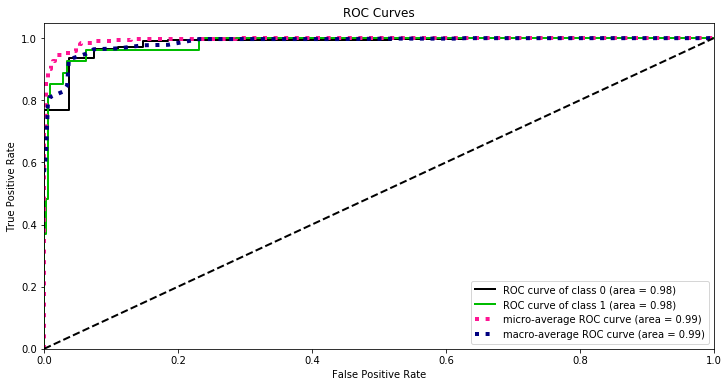

In [7]:
prob_y_imb_vis = clf_imb.predict_proba(X_test_imb)
skplt.metrics.plot_roc(y_test_imb, prob_y_imb_vis)
plt.show()

Precision: 0.9166666666666666, recall: 0.4074074074074074, F1: 0.5641025641025641


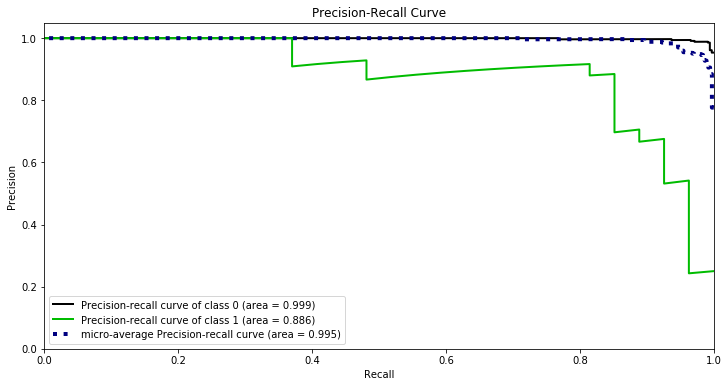

In [8]:
y_imb_pred = clf_imb.predict(X_test_imb)
precision_imb = precision_score(y_test_imb, y_imb_pred)
recall_imb = recall_score(y_test_imb, y_imb_pred)
f1_imb = f1_score(y_test_imb, y_imb_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_imb, recall_imb, f1_imb))

skplt.metrics.plot_precision_recall(y_test_imb, prob_y_imb_vis)
plt.show()

### Down-sampling

In [9]:
df_fraudlent_imbalanced = df[df['fraud'] == 1]
df_non_fraudlent_imbalanced = df[df['fraud'] == 0]
df_non_fraudlent_downsampled = resample(df_non_fraudlent_imbalanced, 
                                        replace=False, 
                                        n_samples=104, 
                                        random_state=123)
df_downsampled = pd.concat([df_fraudlent_imbalanced, df_non_fraudlent_downsampled])
df_downsampled.fraud.value_counts()

1    104
0    104
Name: fraud, dtype: int64

In [10]:
X_down = df_downsampled.drop('fraud', axis=1)
y_down = df_downsampled['fraud']

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.2)

clf_down = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_down.fit(X_train_down, y_train_down)
clf_down.score(X_test_down, y_test_down)

0.9047619047619048

In [11]:
prob_y_down = clf_down.predict_proba(X_test_down)
prob_y_down = [p[1] for p in prob_y_down]

In [12]:
roc_auc_score(y_test_down, prob_y_down)

0.9611764705882353

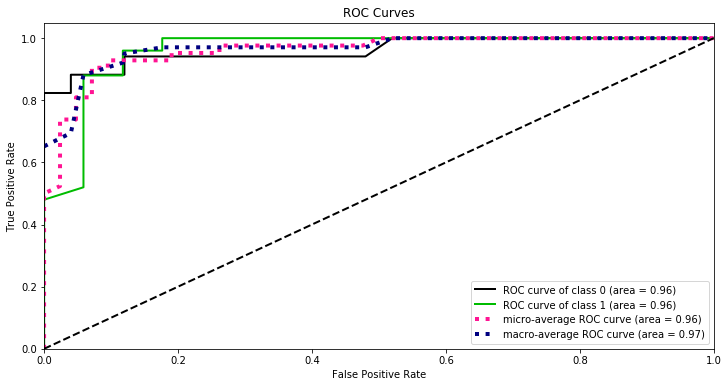

In [13]:
prob_y_down_vis = clf_down.predict_proba(X_test_down)
skplt.metrics.plot_roc(y_test_down, prob_y_down_vis)
plt.show()

Precision: 0.8620689655172413, recall: 1.0, F1: 0.9259259259259259


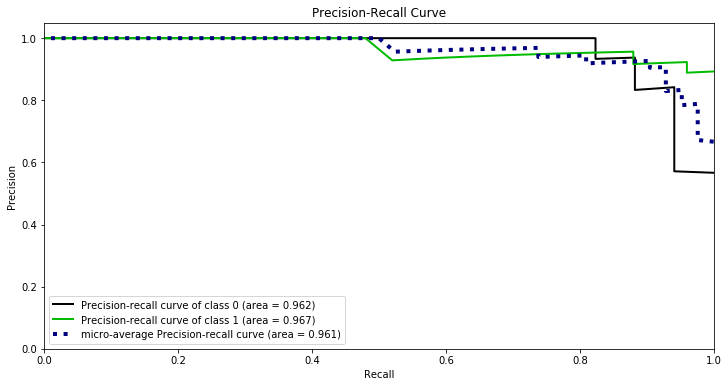

In [14]:
y_down_pred = clf_down.predict(X_test_down)
precision_down = precision_score(y_test_down, y_down_pred)
recall_down = recall_score(y_test_down, y_down_pred)
f1_down = f1_score(y_test_down, y_down_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_down, recall_down, f1_down))

skplt.metrics.plot_precision_recall(y_test_down, prob_y_down_vis)
plt.show()

### Up-sampling

In [15]:
df_fraudlent_imbalanced = df[df['fraud'] == 1]
df_non_fraudlent_imbalanced = df[df['fraud'] == 0]
df_fraudlent_up = resample(df_fraudlent_imbalanced, 
                           replace=True, 
                           n_samples=1775, 
                           random_state=123)
df_upsampled = pd.concat([df_non_fraudlent_imbalanced, df_fraudlent_up])
df_upsampled.fraud.value_counts()

1    1775
0    1775
Name: fraud, dtype: int64

In [16]:
X_up = df_upsampled.drop('fraud', axis=1)
y_up = df_upsampled['fraud']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2)

clf_up = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_up.fit(X_train_up, y_train_up)
clf_up.score(X_test_up, y_test_up)

0.9929577464788732

In [17]:
prob_y_up = clf_up.predict_proba(X_test_up)
prob_y_up = [p[1] for p in prob_y_up]

In [18]:
roc_auc_score(y_test_up, prob_y_up)

1.0

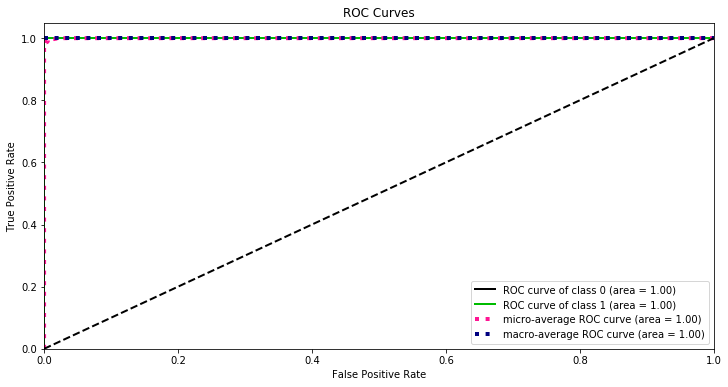

In [19]:
prob_y_up_vis = clf_up.predict_proba(X_test_up)
skplt.metrics.plot_roc(y_test_up, prob_y_up_vis)
plt.show()

Precision: 0.9861111111111112, recall: 1.0, F1: 0.993006993006993


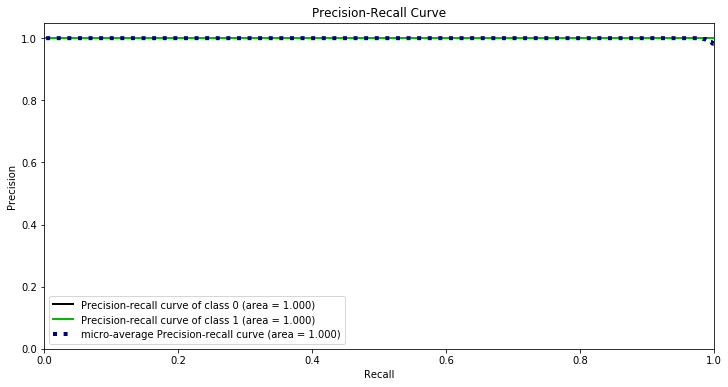

In [20]:
y_up_pred = clf_up.predict(X_test_up)
precision_up = precision_score(y_test_up, y_up_pred)
recall_up = recall_score(y_test_up, y_up_pred)
f1_up = f1_score(y_test_up, y_up_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_up, recall_up, f1_up))

skplt.metrics.plot_precision_recall(y_test_up, prob_y_up_vis)
plt.show()

### Test whether feature normalization can improve precision. 

In [21]:
from sklearn.preprocessing import normalize

In [22]:
X_norm, y_norm = X_up, y_up
X_norm = normalize(X_norm)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2)

In [23]:
clf_norm = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_norm.fit(X_train_norm, y_train_norm)
clf_norm.score(X_test_norm, y_test_norm)

0.9929577464788732

In [24]:
prob_y_norm = clf_norm.predict_proba(X_test_norm)
prob_y_norm = [p[1] for p in prob_y_norm]

In [25]:
roc_auc_score(y_test_norm, prob_y_norm)

1.0

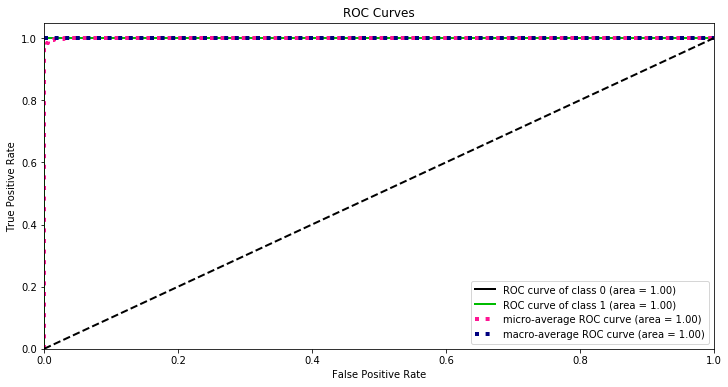

In [26]:
prob_y_norm_vis = clf_norm.predict_proba(X_test_norm)
skplt.metrics.plot_roc(y_test_norm, prob_y_norm_vis)
plt.show()

Precision: 0.9860724233983287, recall: 1.0, F1: 0.9929873772791024


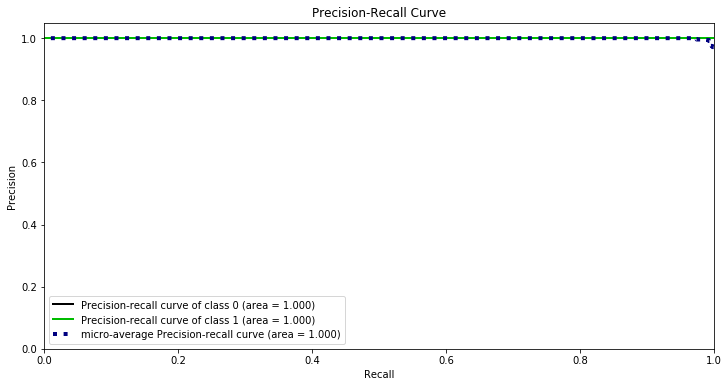

In [27]:
y_norm_pred = clf_norm.predict(X_test_norm)
precision_norm = precision_score(y_test_norm, y_norm_pred)
recall_norm = recall_score(y_test_norm, y_norm_pred)
f1_norm = f1_score(y_test_norm, y_norm_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_norm, recall_norm, f1_norm))

skplt.metrics.plot_precision_recall(y_test_norm, prob_y_norm_vis)
plt.show()

There is no visible improvement.

### Oversampling - take 2
Oversampling done as above may lead to overfitting (very likely judging by the results). 
Let's try oversampling with SMOTE only on the training data.

#### Prepare data

In [28]:
X, y = df.drop('fraud', axis=1), df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [30]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9574468085106383, precision: 0.7083333333333334, recall: 0.6538461538461539, ROC: 0.8169230769230769


In [31]:
len(X_res)

2850

Recall drops drastically - previous models were clearly overfitting.

### ADASYN

In [32]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=123)
X_res, y_res = ad.fit_resample(X_train, y_train)

In [33]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9574468085106383, precision: 0.7083333333333334, recall: 0.6538461538461539, ROC: 0.8169230769230769


### RandomOverSampler

In [34]:
from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler(random_state=123)
X_res, y_res = ro.fit_resample(X_train, y_train)

In [35]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9654255319148937, precision: 0.8421052631578947, recall: 0.6153846153846154, ROC: 0.8034065934065934


### SMOTEENN

In [36]:
from imblearn.combine import SMOTEENN

smnn = SMOTEENN(random_state=123)
X_res, y_res = smnn.fit_resample(X_train, y_train)

In [37]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9574468085106383, precision: 0.6923076923076923, recall: 0.6923076923076923, ROC: 0.8347252747252746


### Undersampling - take 2

### CondensedNearestNeighbour

In [38]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=123)
X_res, y_res = cnn.fit_resample(X_train, y_train)

In [39]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9707446808510638, precision: 0.7777777777777778, recall: 0.8076923076923077, ROC: 0.8952747252747253


### RandomUnderSampler

In [40]:
from datetime import datetime
import random

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=random.seed(datetime.now()))
X_res, y_res = rus.fit_resample(X_train, y_train)

In [42]:
clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy: {}, precision: {}, recall: {}, ROC: {}'.format(acc, prec, rec, roc))

Accuracy: 0.9175531914893617, precision: 0.45454545454545453, recall: 0.9615384615384616, ROC: 0.9379120879120879


### Check simulation results

50 runs for each model.

classifier: `RandomForestClassifier`.
```python
parameters = {'bootstrap': True,
          'max_depth': 80,
          'max_features': 'sqrt',
          'min_samples_leaf': 2,
          'min_samples_split': 5,
          'n_estimators': 1000
}
```
data split: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)`

In [5]:
dfs = pd.read_csv('../data/datasimres_2.csv', ';')
dfs.head()

,model,accuracy,precision,recall,roc
0,smote,0.9681,0.8000,0.5714,0.7815
1,smote,0.9707,0.7619,0.7273,0.8566
2,smote,0.9574,0.5926,0.7619,0.8655
3,smote,0.9654,0.7500,0.6522,0.8190
4,smote,0.9761,0.7500,0.8571,0.9201


In [7]:
dfsg = dfs.groupby('model').mean()
dfsg['F1'] = 2 * (dfsg['precision']*dfsg['recall'] / (dfsg['precision'] + dfsg['recall']))
dfsg

,accuracy,precision,recall,roc,F1
model,,,,,
adasyn,0.959196,0.603870,0.721118,0.846960,0.657306
cnn,0.955686,0.587454,0.842316,0.902460,0.692170
ros,0.972122,0.734618,0.792910,0.887916,0.762652
rus,0.913034,0.396588,0.965820,0.937806,0.562288
smote,0.959464,0.620026,0.700736,0.837704,0.657915
smoteenn,0.953130,0.558004,0.776798,0.870116,0.649469


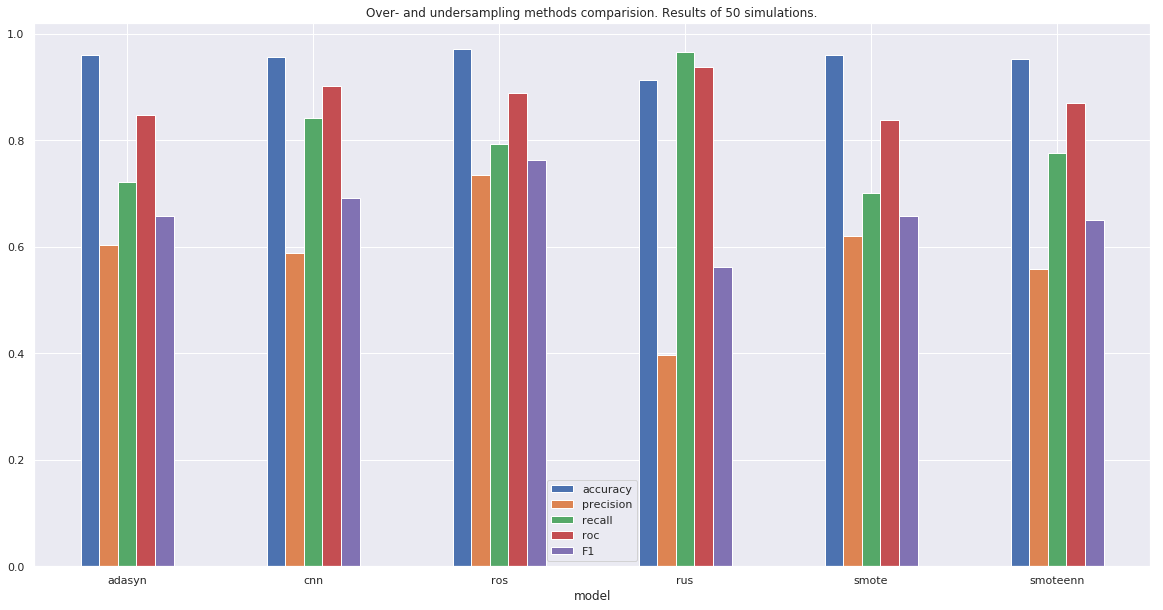

In [24]:
dfsg.plot(kind='bar', 
          figsize=(20,10),
          rot=0,
          title="Over- and undersampling methods comparision. Results of 50 simulations.")

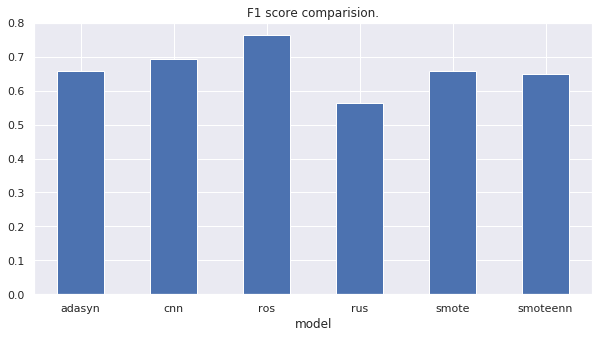

In [25]:
dfsg['F1'].plot(kind='bar', 
                figsize=(10,5),
                rot=0,
                title='F1 score comparision.')